# Assignments for "Data Exploration - Multivariate Analysis

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**(1)** Does the performance in the exams vary according to gender, origin and education level of parents?

In [6]:
df.groupby("gender").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


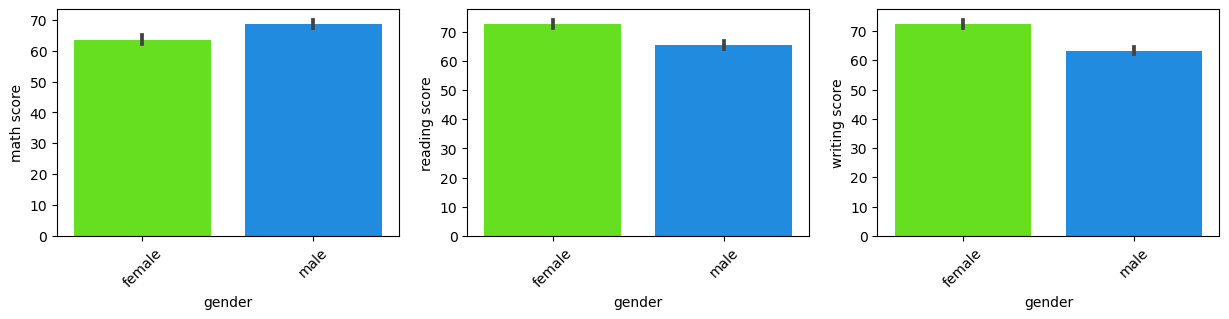

In [23]:
plt.figure(figsize=(15,3),dpi=100)
plt.subplot(1,3,1)
sns.barplot(df["gender"],df["math score"], palette="gist_rainbow")
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.barplot(df["gender"],df["reading score"], palette="gist_rainbow")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.barplot(df["gender"],df["writing score"], palette="gist_rainbow")
plt.xticks(rotation=45)

In [11]:
ttest = ttest_ind(df[df.gender == "female"][["math score", "reading score", "writing score"]],
                  df[df.gender == "male"][["math score", "reading score", "writing score"]])

print("p value for math    : {:.10f}".format(ttest[1][0]))
print("p value for reading : {:.10f}".format(ttest[1][1]))
print("p value for writing : {:.10f}".format(ttest[1][2]))

p value for math    : 0.0000000912
p value for reading : 0.0000000000
p value for writing : 0.0000000000


In [13]:
#Women are successful in reading and writing, while men are more successful in mathematics.

In [14]:
df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


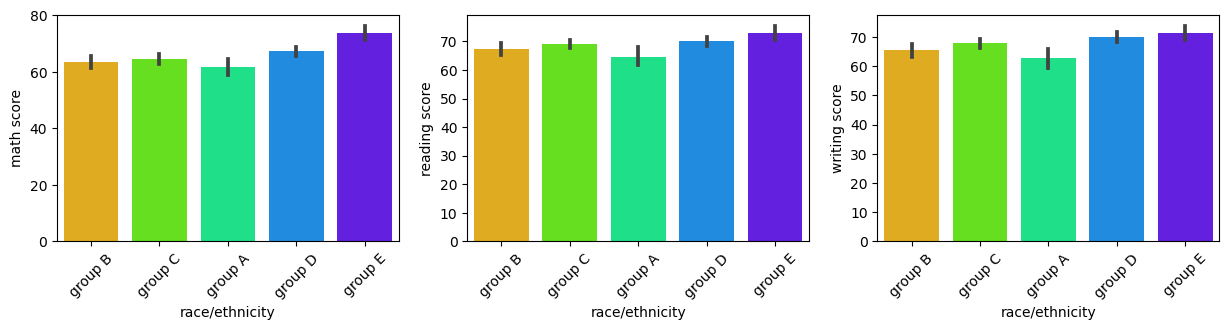

In [25]:
plt.figure(figsize=(15,3),dpi=100)
plt.subplot(1,3,1)
sns.barplot(df["race/ethnicity"],df["math score"], palette="gist_rainbow")
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.barplot(df["race/ethnicity"],df["reading score"], palette="gist_rainbow")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.xticks(rotation=45)
sns.barplot(df["race/ethnicity"],df["writing score"], palette="gist_rainbow")

In [28]:
# Test whether group differences are significant.
ethnicities = df["race/ethnicity"].unique()
grouped_df = df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            test_result = ttest_ind(df[df["race/ethnicity"] == ethnicities[i]][var],
                                    df[df["race/ethnicity"] == ethnicities[j]][var])
            print("t-test p value between {} and {} : {:.10f}".format(ethnicities[i], ethnicities[j], test_result[1] ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test p value between group B and group C : 0.4647708939
t-test p value between group B and group A : 0.3503415962
t-test p value between group B and group D : 0.0048861971
t-test p value between group B and group E : 0.0000000050
t-test p value between group C and group A : 0.1104381075
t-test p value between group C and group D : 0.0158883496
t-test p value between group C and group E : 0.0000000019
t-test p value between group A and group D : 0.0009068636
t-test p value between group A and group E : 0.0000000108
t-test p value between group D and group E : 0.0000231876
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test p value between group B and group C : 0.1866592809
t-test p value between group B and group A : 0.1738735513
t-test p value between group B 

In [ ]:
# Taking into account the t statistics, there are significant differences except between the groups A, B and C.

In [29]:
df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


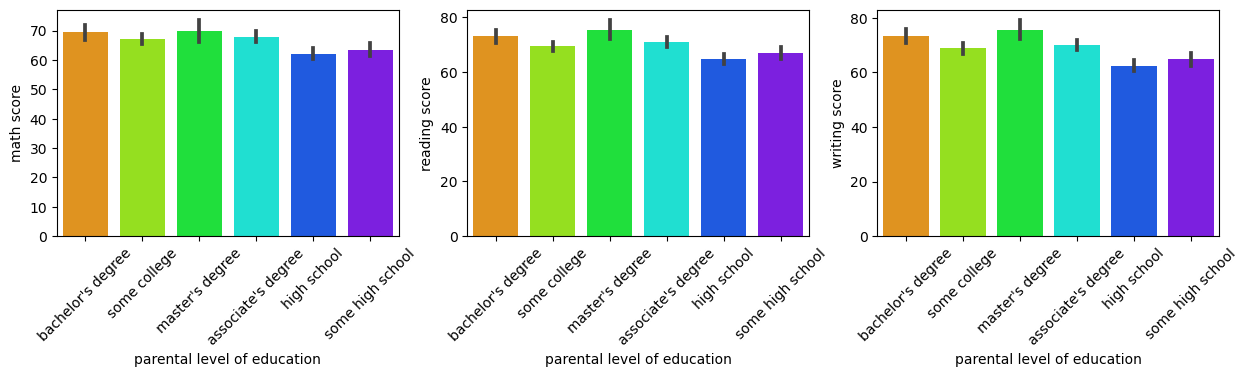

In [27]:
plt.figure(figsize=(15,3),dpi=100)
plt.subplot(1,3,1)
sns.barplot(df["parental level of education"],df["math score"], palette="gist_rainbow")
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.barplot(df["parental level of education"],df["reading score"], palette="gist_rainbow")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.barplot(df["parental level of education"],df["writing score"], palette="gist_rainbow")
plt.xticks(rotation=45);

In [30]:
# Test whether group differences are significant.
level_of_education = df["parental level of education"].unique()
grouped_df = df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(level_of_education)):
        for j in range(i+1, len(level_of_education)):
            test_result = ttest_ind(df[df["parental level of education"] == level_of_education[i]][var],
                                    df[df["parental level of education"] == level_of_education[j]][var])
            print("t-test p value between {} and {} : {:.10f}".format(level_of_education[i], level_of_education[j], test_result[1] ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test p value between bachelor's degree and some college : 0.1715122422
t-test p value between bachelor's degree and master's degree : 0.8819757825
t-test p value between bachelor's degree and associate's degree : 0.3802075782
t-test p value between bachelor's degree and high school : 0.0000299653
t-test p value between bachelor's degree and some high school : 0.0015409193
t-test p value between some college and master's degree : 0.2176195681
t-test p value between some college and associate's degree : 0.5876182809
t-test p value between some college and high school : 0.0004349800
t-test p value between some college and some high school : 0.0163243616
t-test p value between master's degree and associate's degree : 0.4009993636
t-test p value between master's degree and high school : 0.0005709292
t-test p value between master's degree and some high scho

In [31]:
# There are some significant differences between some groups like master's degree and high school.

**(2)** Does lunch type have a relationship with exam performances? How can you explain this, if any?

In [32]:
df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [33]:
ttest_result = ttest_ind(df[df.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
          df[df.lunch == "standard"][["math score", "reading score", "writing score"]])

print("p value for math    : {:.10f}".format(ttest_result[1][0]))
print("p value for reading : {:.10f}".format(ttest_result[1][1]))
print("p value for writing : {:.10f}".format(ttest_result[1][2]))

p value for math    : 0.0000000000
p value for reading : 0.0000000000
p value for writing : 0.0000000000


In [34]:
# Students who have standard lunch are more successful than the others.

**(3)** Does the preparation courses have an impact on exam performance?

In [35]:
df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [36]:
ttest_result = ttest_ind(df[df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
                         df[df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

print("p value for math    : {:.10f}".format(ttest_result[1][0]))
print("p value for reading : {:.10f}".format(ttest_result[1][1]))
print("p value for writing : {:.10f}".format(ttest_result[1][2]))

p value for math    : 0.0000000154
p value for reading : 0.0000000000
p value for writing : 0.0000000000


In [37]:
# Those who complete the exam preparation course are more successful than others.

**(4)** Which lessons are most correlated with each other?

In [38]:
df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


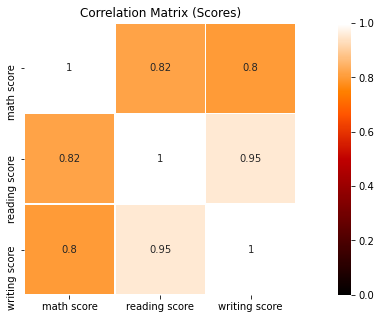

In [40]:
plt.figure(figsize=(15,5))

corr_ = df[["math score", "reading score", "writing score"]].corr()
sns.heatmap(corr_, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='gist_heat')
plt.title("Correlation Matrix (Scores)")

plt.show()